<a href="https://colab.research.google.com/github/ajmd2/Jinling-Enlightenment/blob/main/rl/Q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gym
from matplotlib import pyplot as plt
%matplotlib inline
import os

os.environ['SDL_VIDEODRIVER'] = 'dummpy'

env = gym.make("FrozenLake-v1",
               is_slippery =False,
               map_name = '4x4',
               desc = ['SFFF','FHFH','FFFH','HFFG'])

env.reset()

env = env.unwrapped

def show():
  plt.imshow(env.render(mode='rgb_array'))
  plt.show()
show()


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. S

error: dummpy not available

In [ ]:
len(env.P),env.P[0]

(16,
 {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 4, 0.0, False)],
  2: [(1.0, 1, 0.0, False)],
  3: [(1.0, 0, 0.0, False)]})

In [ ]:
import numpy as np

values = np.zeros(16)

pi = np.ones([16,4])*0.25

def get_qsa(state,action):
  value =0.0

  for prop,next_state, reward, over in env.P[state][action]:

   next_value = values[next_state]*0.9

   if over:
     next_value = 0
   next_value  +=reward

   next_value *= prop

   value += next_value

  return value

get_qsa(0,0)
_

(16,
 {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 4, 0.0, False)],
  2: [(1.0, 1, 0.0, False)],
  3: [(1.0, 0, 0.0, False)]})

In [ ]:
# 策略评估

algorithm = "policy iteration"
def get_values():

  new_values = np.zeros[(16)]


  for state in range(16):
     action_value = np.zeros(4)

     for action in range(4):
       action_value[action] = get_qsa(state, action) # 更新V 就要先找到当前节点下所有的action,然后用qsa更新action的值

     if algorithm == "policy iteration":
       action_value = pi[state]

       new_values[state] = action_value.sum()

     if algorithm == "value iteration":

       new_values[state] = action_value.max()

  return new_values

# 策略提升
# 我没想到的是 value iteration 原来也需要这里的策略提升 也就是修改pi中的值

def get_pi():
  new_pi = np.zeros([16,4])

  for state in range(16):
     action_value = np.zeros(4)

     for action in range(4):
      action_value[action] = get_qsa(state,action) # 最后还是用qsa来更新动作价值 也就是 rt + V(st+1)

      count = (action_value == action_value.max()).sum()

      for action in range(4):
        if action_value[action] == action_value.max():
           new_pi =[state,action] = 1/ count
        else:
           new_pi =[state,action] = 0
  return new_pi

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 22)

In [ ]:
for _ in range(10):
  for _ in range(100):
    values = get_values()
  pi = get_pi()

values, pi

In [ ]:
from IPython import display
import time

def play():
  env.resnet()

  index = 0

  for i in range(200):

    action = np.random.choice(np.arange(4),size=1,p = pi[index])[0]

    index ,reward ,terminated, truncated,_ =env.step(action)

    display.clear_output(wait=True)
    time.sleep(0.1)
    show()

    if terminated or truncated:
      break
  print(i)

GYM游戏环境介绍

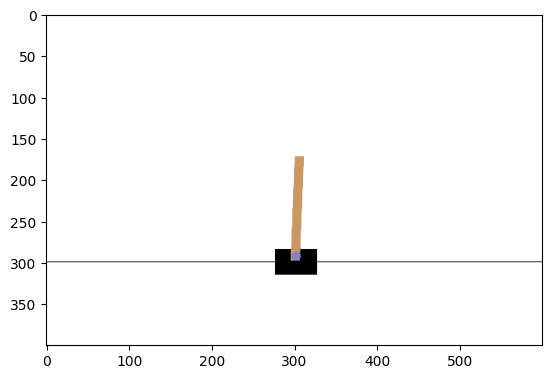

In [ ]:
import gym
import os
from matplotlib import pyplot as plt
%matplotlib inline

os.environ["SDL_VIDEODRIVER"]='dummpy'

env = gym.make('CartPole-v0')

env.reset()

plt.imshow(env.render(mode='rgb_array'))
plt.show()

env.close()

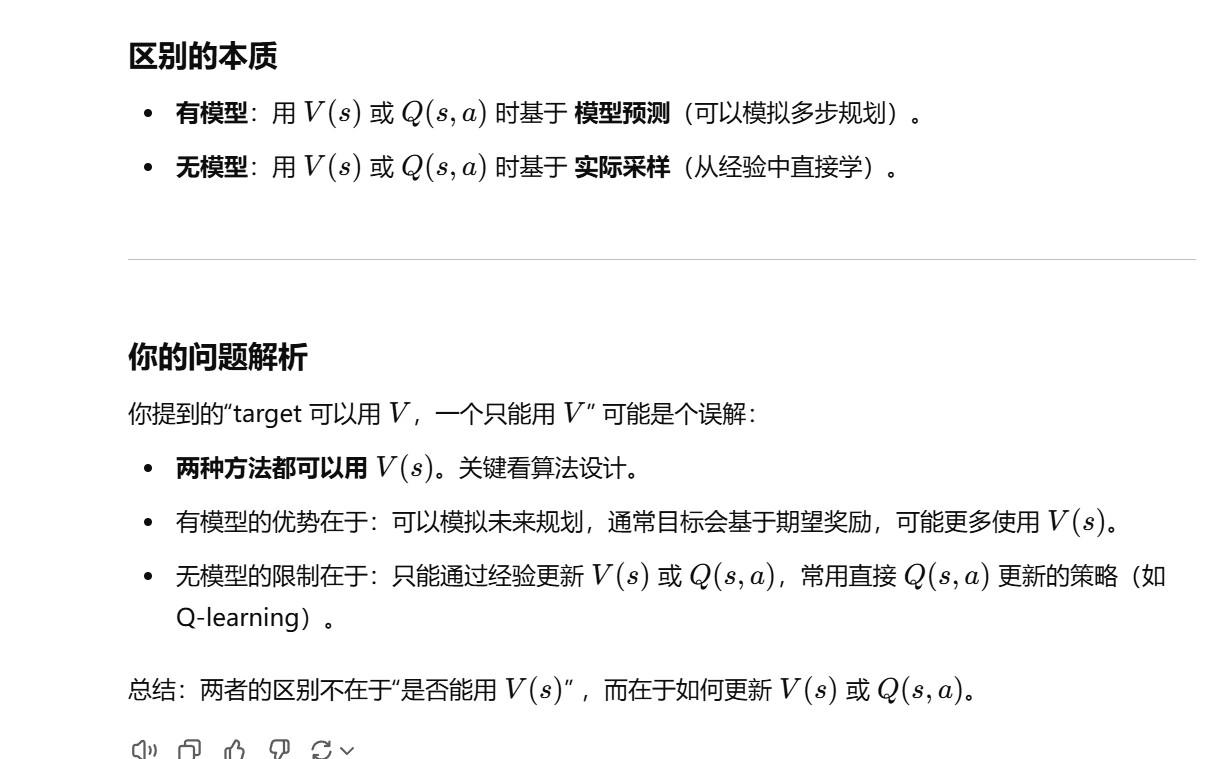

是的，你的理解基本正确！动态规划（Dynamic Programming, DP）通常被认为是**有模型（model-based）**的方法，这是因为动态规划依赖于环境的模型信息来进行计算和规划。

---

### **动态规划是有模型的原因**
1. **环境模型的假设**：
   - 动态规划要求已知环境的**状态转移概率** \(P(s'|s, a)\) 和**奖励函数** \(R(s, a)\)。
   - 它通过这些已知的模型信息，计算出最优的策略或价值函数。

2. **典型例子**：
   - **贝尔曼方程（Bellman Equation）**：动态规划基于贝尔曼方程递归地计算状态值或动作值。
     \[
     V(s) = \max_a \sum_{s'} P(s'|s, a) \left[ R(s, a, s') + \gamma V(s') \right]
     \]
   - 这里 \(P(s'|s, a)\) 和 \(R(s, a, s')\) 都是需要已知的模型信息。

3. **求解过程**：
   - 动态规划的核心算法（如价值迭代、策略迭代）通过模型直接计算最优策略。
   - 没有环境模型，动态规划就无法运行。

---

### **对比无模型方法**
1. **无模型方法（如蒙特卡洛、Q-learning）**：
   - 不需要知道 \(P(s'|s, a)\) 和 \(R(s, a)\)，而是通过与环境交互的**采样**数据来估计价值函数或学习策略。
   - 这些方法适合未知或复杂的环境。

2. **本质区别**：
   - **有模型**：通过已知模型进行规划和计算。
   - **无模型**：通过采样结果进行估计和学习。

---

### **总结**
动态规划是典型的**有模型方法**，因为它依赖于环境的明确模型（转移概率和奖励函数）。而无模型方法（如多臂老虎机、Q-learning、Actor-Critic 等）直接从与环境的交互中学习，无需依赖明确的模型。你的理解完全正确！ 😊

有模型： 有上帝视角
无模型： 没有上帝视角

1 sarsa 算法 根据S,A,R,S,A计算更新量



In [ ]:
def get_state(row,col):
  if row !=3:
    return 'ground'

  if row ==3 and col ==0:
    return 'ground'

  if row == 3 and col ==11:
    return 'terminal'


  return 'trap'

# get_state(0,0)


def move(row,col,action):

  # 未执行action 前
  if get_state(row,col) in ['trap','terminal']:
    return row,col,0

  if action == 0: # 上
    row -=1
  if action == 1: # 下
    row +=1
  if action == 2: # 左
    col -=1
  if action == 3: # 右
    col +=1

  row = max(0,row)
  row = min(3,row)
  col = max(0,col)
  col = min(11,col)

  # 执行action 后

  reward =-1
  if get_state(row,col) == 'trap':
    reward =-100

  return row,col,reward


初始化Q矩阵，用于评估每个动作的价值 之前我们用的是qsa函数，公式是 $ Q_t= r_t+ \gamma * V(s_{t+1}) $


  target = 0.9*Q[next_row,next_col,next_action] # 这样写就是sarsa

  target  = 0.9*[next_row,next_col].max()  # 这样写就是Q-learning


  加权平均的就是基于策略的，直接max就是基于value的

In [ ]:
import numpy as np

Q = np.zeros([4,12,4])

# sarsa算法修改就是这里的Q矩阵的价值，也就是更新每个动作的价值评估
Q.shape

import random

def get_action(row,col):
  if random.random()<0.1:
    return random.choice(range(4))

  return Q[row,col].argmax()

get_action(0,0)

def get_update(row, col, action, reward, next_row, next_col, next_action):

  target = 0.9*Q[next_row,next_col,next_action] # 这样写就是sarsa
  # target  = 0.9*[next_row,next_col].max()  # 这样写就是Q-learning
  target += reward

  value = Q[row,col,action]

  # 根据时序差分算法，当前的state,action 的分数 = 下一个state ,action 的分数*gamma + reward
  # 此处是求两者的差值，越接近0越好

  update = target - value

  update *= 0.1 # lr

  return update

get_update(0,0,3,-1,0,1,3)

In [ ]:
#训练
def train():
  for epoch in range(1500):
    row = random.choice(range(4))
    col = 0

    action = get_action(row,col)

    reward_sum = 0

    while get_state(row,col) not in ['trap','terminal']:

      next_row, next_col, reward = move(row,col,action)
      reward_sum +=reward

      next_action = get_action(next_row,next_col)

      update = get_update(row,col,action,reward,next_row,next_col,next_action)

      Q[row,col,action] +=update

      # 更新当前位置
      row = next_row
      col = next_col
      action = next_action

N步Sarsa算法
玩N步之后更新第一步的参数

In [ ]:
#初始化Q矩阵

import numpy as np

Q = np.zeros([4,12,4])


state_list = []
action_list = []
reward_list = []

Q.shape

(4, 12, 4)

In [ ]:
def get_update_list(next_row,next_col,next_action):
  # 初始化的target是最后一个state和最后一个action 的分数
  target = Q[next_row,next_col,next_action]

  # 计算每一步的target,其等于下一步的target*0.9 再加上本步的reward
  # 时间从后往前回溯，越以前的target会累加的信息越多

  target_list = []
  for i in reversed(range(5)):
    target = 0.9* target + reward_list[i]
    target_list.append(target)

  target_list = list(reversed(target_list))

  value_list = []

  for i in range(5):
    row, col = state_list[i]
    action = action_list[i]
    value_list.append(Q[row,col,action])



  update_list = []
  for i in range(5):
    update = target_list[i] - value_list[i]
    update *=0.1

    update_list.append(update)

  return update_list # 还是在更新Q，每个动作的值，有了这里的Q矩阵相当于有了Pi(这里的策略就是最大的价值的action瓜分s下的发生动作的概率)

In [ ]:
def train():
  for epoch in range(1500):

    row = random.choice(range(4))
    col = 0

    action = get_action(row,col)

    reward_sum = 0

    state_list.clear()
    action_list.clear()
    reward_list.clear()

    while get_state(row,col) not in ['trap','terminal']:

      next_row, next_col, reward = move(row,col,action)
      reward_sum += reward

      next_action = get_action(next_row,next_col)


      # 记录历史数据
      state_list.append(row,col)
      action_list.append(action)
      reward_list.append(reward)

      if len(state_list) == 5: # 累计到5步以后开始更新参数

        update_list = get_update_list(next_row, next_col, next_action)

        row, col = state_list[0]
        action = action_list[0]
        update = update_list[0]

        Q[row,col,action] += update

        state_list.pop(0)
        action_list.pop(0)
        reward_list.pop(0)

      row = next_row
      col = next_col
      action = next_action


    # 走动终点以后，更新剩下的步数的update

    for i in range(len(state_list)):
      row, col = state_list[i]
      action  = action_list[i]
      update = update_list[i]
      Q[row,col,action] += update

    if epoch % 100 == 0:
      print(epoch,reward_sum)



DynaQ 数据反刍，温故而知新（离线学习）

In [ ]:
import numpy as np
Q = np.zeros([4,12,4])

history = dict()

Q.shape, history

((4, 12, 4), {})

In [ ]:
import random

def q_planning():

  for _ in range(20):
    row,col,action = random.choice(list(history.keys()))

    next_row,next_col,reward = history[(row,col,action)]

    update = get_update(row,col,action, reward ,next_row,next_col)

    Q[row,col,action] += update